**GET DATA**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zimnat-insurance-recommendation-challenge/SampleSubmission.csv
/kaggle/input/zimnat-insurance-recommendation-challenge/Test.csv
/kaggle/input/zimnat-insurance-recommendation-challenge/Data Description.txt
/kaggle/input/zimnat-insurance-recommendation-challenge/Train.csv


In [2]:
train=pd.read_csv("../input/zimnat-insurance-recommendation-challenge/Train.csv")
test=pd.read_csv("../input/zimnat-insurance-recommendation-challenge/Test.csv")

**UNDERSTANDING DATA**

In [3]:
train.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,0,...,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,0,...,0,0,0,0,0,0,1,1,0,0


In [4]:
train.shape

(29132, 29)

In [5]:
test.shape

(10000, 29)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29132 entries, 0 to 29131
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        29132 non-null  object
 1   join_date                 29130 non-null  object
 2   sex                       29132 non-null  object
 3   marital_status            29132 non-null  object
 4   birth_year                29132 non-null  int64 
 5   branch_code               29132 non-null  object
 6   occupation_code           29132 non-null  object
 7   occupation_category_code  29132 non-null  object
 8   P5DA                      29132 non-null  int64 
 9   RIBP                      29132 non-null  int64 
 10  8NN1                      29132 non-null  int64 
 11  7POT                      29132 non-null  int64 
 12  66FJ                      29132 non-null  int64 
 13  GYSR                      29132 non-null  int64 
 14  SOP4                  

In [7]:
train.nunique()

ID                          29132
join_date                     132
sex                             2
marital_status                  8
birth_year                     61
branch_code                    15
occupation_code               233
occupation_category_code        6
P5DA                            2
RIBP                            2
8NN1                            2
7POT                            2
66FJ                            2
GYSR                            2
SOP4                            2
RVSZ                            2
PYUQ                            2
LJR9                            2
N2MW                            2
AHXO                            2
BSTQ                            2
FM3X                            2
K6QO                            2
QBOL                            2
JWFN                            2
JZ9D                            2
J9JW                            2
GHYX                            2
ECY3                            2
dtype: int64

In [8]:
train.isnull().sum()

ID                          0
join_date                   2
sex                         0
marital_status              0
birth_year                  0
branch_code                 0
occupation_code             0
occupation_category_code    0
P5DA                        0
RIBP                        0
8NN1                        0
7POT                        0
66FJ                        0
GYSR                        0
SOP4                        0
RVSZ                        0
PYUQ                        0
LJR9                        0
N2MW                        0
AHXO                        0
BSTQ                        0
FM3X                        0
K6QO                        0
QBOL                        0
JWFN                        0
JZ9D                        0
J9JW                        0
GHYX                        0
ECY3                        0
dtype: int64

**FORMATTING DATA**

In [9]:
TRAIN = []
TRAIN_columns = train.columns
c = 0
for v in train.values:
  info = v[:8]
  binary = v[8:]
  index = [k for k, i in enumerate(binary) if i == 1]
  for i in index:
    c+=1
    for k in range(len(binary)):
      if k == i:
        binary_transformed = list(copy.copy(binary))
        binary_transformed[i] = 0
        TRAIN.append(list(info) + binary_transformed + [TRAIN_columns[8+k]] + [c])

TRAIN = pd.DataFrame(TRAIN)
TRAIN.columns = ['ID', 'join_date', 'sex', 'marital_status', 'birth_year', 'branch_code',
       'occupation_code', 'occupation_category_code', 'P5DA', 'RIBP', '8NN1',
       '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO',
       'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3', 'product_pred', 'ID2']

In [10]:
TEST=[]
true_values = []
c = 0
for v in test.values:
  c += 1
  info = v[:8]
  binary = v[8:]
  index = [k for k, i in enumerate(binary) if i == 1]
  TEST.append(list(info) + list(binary) + [c])
  for k in test.columns[8:][index]:
    true_values.append(v[0] + ' X ' + k)

TEST = pd.DataFrame(TEST)
TEST.columns = ['ID', 'join_date', 'sex', 'marital_status', 'birth_year', 'branch_code',
       'occupation_code', 'occupation_category_code', 'P5DA', 'RIBP', '8NN1',
       '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO',
       'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3', 'ID2']

In [11]:
true_values

['F86J5PC X RVSZ',
 'H6141K3 X RVSZ',
 'H6141K3 X K6QO',
 'RBAYUXZ X RVSZ',
 'RBAYUXZ X K6QO',
 'KCBILBQ X RVSZ',
 'LSEC1ZJ X JZ9D',
 'EK65KRH X QBOL',
 'M3N7TLU X RVSZ',
 'QAC6HOX X RVSZ',
 'T8B9JK0 X RVSZ',
 '62M79HM X K6QO',
 'VIFSSA7 X K6QO',
 'VIFSSA7 X ECY3',
 'I8ONWLM X RVSZ',
 'B0FID1U X RIBP',
 'ZHVYJ0A X RVSZ',
 'ZHVYJ0A X QBOL',
 '1IWADO4 X 66FJ',
 '2PAL7JV X 66FJ',
 '29RYY4N X RVSZ',
 'X9NBDB4 X RVSZ',
 'X9NBDB4 X QBOL',
 'UITK6GR X K6QO',
 'JONQI5H X RIBP',
 'JONQI5H X AHXO',
 'ZV7EC7L X RVSZ',
 'BWT1QRH X K6QO',
 'BWT1QRH X QBOL',
 'C285E9K X JZ9D',
 'C285E9K X J9JW',
 'BZH5P4P X K6QO',
 '2OQOFQT X K6QO',
 'I58UV5Q X RVSZ',
 'I58UV5Q X GHYX',
 'XGUUGI1 X RVSZ',
 'XGUUGI1 X QBOL',
 'XGUUGI1 X GHYX',
 'EMVH2HP X RIBP',
 'W019HSR X RVSZ',
 '7J868QB X K6QO',
 'DSYNYH6 X RVSZ',
 'GB16H1Y X K6QO',
 'Z2B00YJ X RIBP',
 'Z2B00YJ X RVSZ',
 'HLVUKNT X K6QO',
 'F5SDCA2 X K6QO',
 'E71I179 X RVSZ',
 'FRXT1NR X K6QO',
 'C1ESAII X K6QO',
 'SREJ35I X J9JW',
 'CVSALUL X RVSZ',
 '4YK8AHG X 

**DATA VISUALISATION**

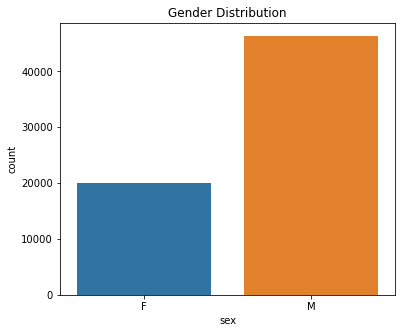

In [12]:
plt.figure(figsize=(6,5))
plt.title("Gender Distribution")
sns.countplot(TRAIN["sex"])

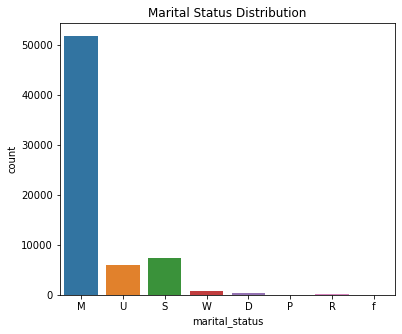

In [13]:
plt.figure(figsize=(6,5))
plt.title("Marital Status Distribution")
sns.countplot(TRAIN["marital_status"])

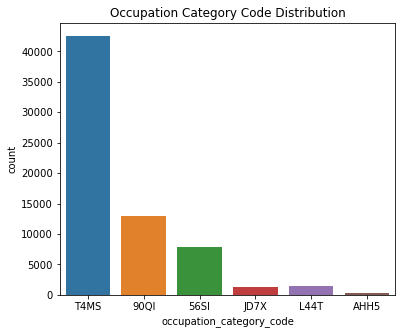

In [14]:
plt.figure(figsize=(6,5))
plt.title("Occupation Category Code Distribution")
sns.countplot(TRAIN["occupation_category_code"])

**TRANSFORM DATA-FEATURES AND TARGETS**

In [15]:
x_train = []
x_test = []
columns = []

append_features = ['P5DA', 'RIBP', '8NN1', '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 
'N2MW', 'AHXO','BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 
'ECY3', 'ID', 'ID2', 'join_date', 'sex', 'marital_status', 'branch_code', 'occupation_code', 'occupation_category_code',
'birth_year']
for v in append_features:
  x_train.append(TRAIN[v].values.reshape(-1, 1))
  x_test.append(TEST[v].values.reshape(-1, 1))
  columns.append(np.array([v]))

y_TRAIN = TRAIN[['product_pred']]

In [16]:
x_train = np.concatenate(x_train, axis=1)
x_test = np.concatenate(x_test, axis=1)
columns = np.concatenate(np.array(columns))

In [17]:
TRAIN = pd.DataFrame(x_train)
TRAIN.columns = columns
TEST = pd.DataFrame(x_test)
TEST.columns = columns

**FEATURE GENERATION**

In [18]:
TRAIN['date1'] = TRAIN['join_date'].apply(lambda x: int(x.split('/')[0]) if (x == x) else np.nan)
TRAIN['date2'] = TRAIN['join_date'].apply(lambda x: int(x.split('/')[1]) if (x == x) else np.nan)
TRAIN['date3'] = TRAIN['join_date'].apply(lambda x: int(x.split('/')[2]) if (x == x) else np.nan)
TRAIN.drop(['join_date'],axis=1,inplace=True)

TEST['date1'] = TEST['join_date'].apply(lambda x: int(x.split('/')[0]) if (x == x) else np.nan)
TEST['date2'] = TEST['join_date'].apply(lambda x: int(x.split('/')[1]) if (x == x) else np.nan)
TEST['date3'] = TEST['join_date'].apply(lambda x: int(x.split('/')[2]) if (x == x) else np.nan)
TEST.drop(['join_date'],axis=1,inplace=True)

TRAIN['age_at_joining'] = TRAIN['date3'] - TRAIN['birth_year']
TEST['age_at_joining'] = TEST['date3'] - TEST['birth_year']

**FEATURE ENGINEERING**

In [19]:
#Handling Missing Values
TRAIN=TRAIN.fillna(0)
TEST=TEST.fillna(0)
y_TRAIN=y_TRAIN.fillna(0)

In [20]:
#Handling Categoricals
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for_cat=TRAIN.append(TEST)
for i in ["ID","marital_status","sex","occupation_code","occupation_category_code","branch_code"]:
    for_cat.loc[:,v]=le.fit_transform(for_cat.loc[:,v])
TRAIN = for_cat[:TRAIN.shape[0]]
TEST = for_cat[-TEST.shape[0]:]

le.fit(y_TRAIN.iloc[:,0])
y_TRAIN = pd.DataFrame(le.transform(y_TRAIN.iloc[:,0]))
y_TRAIN.columns = ['target']

**MODEL**

In [21]:
from catboost import CatBoostClassifier
cat_model=CatBoostClassifier()
cat_model.fit(TRAIN.drop(columns=['ID', 'ID2']), y_TRAIN, cat_features=['sex','marital_status','branch_code','occupation_code','occupation_category_code'])

Learning rate set to 0.098003
0:	learn: 1.7837255	total: 6.99s	remaining: 1h 56m 20s
1:	learn: 1.5780548	total: 13.5s	remaining: 1h 52m 38s
2:	learn: 1.4111625	total: 20.3s	remaining: 1h 52m 42s
3:	learn: 1.3028152	total: 24.5s	remaining: 1h 41m 30s
4:	learn: 1.1926574	total: 31.3s	remaining: 1h 43m 43s
5:	learn: 1.1052790	total: 38.3s	remaining: 1h 45m 49s
6:	learn: 1.0376100	total: 45.4s	remaining: 1h 47m 26s
7:	learn: 0.9787207	total: 52.4s	remaining: 1h 48m 22s
8:	learn: 0.9277719	total: 59.1s	remaining: 1h 48m 23s
9:	learn: 0.8868196	total: 1m 5s	remaining: 1h 48m 32s
10:	learn: 0.8507237	total: 1m 12s	remaining: 1h 48m
11:	learn: 0.8163409	total: 1m 18s	remaining: 1h 47m 59s
12:	learn: 0.7856310	total: 1m 25s	remaining: 1h 47m 50s
13:	learn: 0.7592917	total: 1m 31s	remaining: 1h 46m 53s
14:	learn: 0.7338182	total: 1m 37s	remaining: 1h 46m 23s
15:	learn: 0.7121350	total: 1m 43s	remaining: 1h 45m 42s
16:	learn: 0.6930758	total: 1m 48s	remaining: 1h 44m 49s
17:	learn: 0.6747357	tota

143:	learn: 0.3941542	total: 16m 43s	remaining: 1h 39m 24s
144:	learn: 0.3936953	total: 16m 50s	remaining: 1h 39m 20s
145:	learn: 0.3935823	total: 16m 57s	remaining: 1h 39m 13s
146:	learn: 0.3933013	total: 17m 5s	remaining: 1h 39m 10s
147:	learn: 0.3928242	total: 17m 12s	remaining: 1h 39m 6s
148:	learn: 0.3920415	total: 17m 20s	remaining: 1h 39m 4s
149:	learn: 0.3915872	total: 17m 26s	remaining: 1h 38m 52s
150:	learn: 0.3912980	total: 17m 34s	remaining: 1h 38m 47s
151:	learn: 0.3907237	total: 17m 42s	remaining: 1h 38m 50s
152:	learn: 0.3901988	total: 17m 50s	remaining: 1h 38m 46s
153:	learn: 0.3897936	total: 17m 56s	remaining: 1h 38m 33s
154:	learn: 0.3893269	total: 18m 2s	remaining: 1h 38m 21s
155:	learn: 0.3888015	total: 18m 10s	remaining: 1h 38m 17s
156:	learn: 0.3885350	total: 18m 17s	remaining: 1h 38m 13s
157:	learn: 0.3884837	total: 18m 26s	remaining: 1h 38m 15s
158:	learn: 0.3881946	total: 18m 35s	remaining: 1h 38m 19s
159:	learn: 0.3877708	total: 18m 43s	remaining: 1h 38m 16s
1

283:	learn: 0.3609620	total: 34m 21s	remaining: 1h 26m 36s
284:	learn: 0.3608193	total: 34m 29s	remaining: 1h 26m 31s
285:	learn: 0.3606926	total: 34m 37s	remaining: 1h 26m 27s
286:	learn: 0.3606313	total: 34m 45s	remaining: 1h 26m 21s
287:	learn: 0.3604567	total: 34m 53s	remaining: 1h 26m 15s
288:	learn: 0.3602901	total: 35m	remaining: 1h 26m 8s
289:	learn: 0.3602151	total: 35m 9s	remaining: 1h 26m 3s
290:	learn: 0.3601734	total: 35m 17s	remaining: 1h 25m 58s
291:	learn: 0.3600605	total: 35m 24s	remaining: 1h 25m 51s
292:	learn: 0.3599908	total: 35m 33s	remaining: 1h 25m 47s
293:	learn: 0.3599406	total: 35m 40s	remaining: 1h 25m 40s
294:	learn: 0.3597645	total: 35m 48s	remaining: 1h 25m 35s
295:	learn: 0.3596742	total: 35m 55s	remaining: 1h 25m 27s
296:	learn: 0.3596366	total: 36m 4s	remaining: 1h 25m 23s
297:	learn: 0.3593959	total: 36m 11s	remaining: 1h 25m 16s
298:	learn: 0.3593269	total: 36m 19s	remaining: 1h 25m 9s
299:	learn: 0.3592205	total: 36m 26s	remaining: 1h 25m 2s
300:	le

423:	learn: 0.3452956	total: 52m 25s	remaining: 1h 11m 12s
424:	learn: 0.3452295	total: 52m 32s	remaining: 1h 11m 5s
425:	learn: 0.3451114	total: 52m 40s	remaining: 1h 10m 58s
426:	learn: 0.3449855	total: 52m 49s	remaining: 1h 10m 52s
427:	learn: 0.3447771	total: 52m 57s	remaining: 1h 10m 46s
428:	learn: 0.3446625	total: 53m 5s	remaining: 1h 10m 40s
429:	learn: 0.3444768	total: 53m 13s	remaining: 1h 10m 32s
430:	learn: 0.3443147	total: 53m 20s	remaining: 1h 10m 25s
431:	learn: 0.3442018	total: 53m 29s	remaining: 1h 10m 19s
432:	learn: 0.3440572	total: 53m 36s	remaining: 1h 10m 12s
433:	learn: 0.3438666	total: 53m 44s	remaining: 1h 10m 5s
434:	learn: 0.3436258	total: 53m 52s	remaining: 1h 9m 58s
435:	learn: 0.3435179	total: 53m 59s	remaining: 1h 9m 50s
436:	learn: 0.3434106	total: 54m 6s	remaining: 1h 9m 43s
437:	learn: 0.3433161	total: 54m 14s	remaining: 1h 9m 35s
438:	learn: 0.3432338	total: 54m 22s	remaining: 1h 9m 29s
439:	learn: 0.3431248	total: 54m 29s	remaining: 1h 9m 20s
440:	le

565:	learn: 0.3325402	total: 1h 10m 45s	remaining: 54m 15s
566:	learn: 0.3324878	total: 1h 10m 52s	remaining: 54m 7s
567:	learn: 0.3324263	total: 1h 10m 59s	remaining: 53m 59s
568:	learn: 0.3321852	total: 1h 11m 7s	remaining: 53m 52s
569:	learn: 0.3321352	total: 1h 11m 14s	remaining: 53m 44s
570:	learn: 0.3319875	total: 1h 11m 21s	remaining: 53m 36s
571:	learn: 0.3319206	total: 1h 11m 30s	remaining: 53m 30s
572:	learn: 0.3318720	total: 1h 11m 39s	remaining: 53m 23s
573:	learn: 0.3318021	total: 1h 11m 46s	remaining: 53m 16s
574:	learn: 0.3317192	total: 1h 11m 55s	remaining: 53m 9s
575:	learn: 0.3316163	total: 1h 12m 1s	remaining: 53m 1s
576:	learn: 0.3315738	total: 1h 12m 9s	remaining: 52m 53s
577:	learn: 0.3315276	total: 1h 12m 17s	remaining: 52m 46s
578:	learn: 0.3314659	total: 1h 12m 24s	remaining: 52m 38s
579:	learn: 0.3313487	total: 1h 12m 31s	remaining: 52m 30s
580:	learn: 0.3311357	total: 1h 12m 40s	remaining: 52m 24s
581:	learn: 0.3311139	total: 1h 12m 49s	remaining: 52m 17s
582

705:	learn: 0.3207301	total: 1h 28m 48s	remaining: 36m 59s
706:	learn: 0.3206421	total: 1h 28m 56s	remaining: 36m 51s
707:	learn: 0.3205742	total: 1h 29m 4s	remaining: 36m 44s
708:	learn: 0.3204420	total: 1h 29m 11s	remaining: 36m 36s
709:	learn: 0.3204021	total: 1h 29m 18s	remaining: 36m 28s
710:	learn: 0.3203577	total: 1h 29m 26s	remaining: 36m 21s
711:	learn: 0.3202021	total: 1h 29m 34s	remaining: 36m 13s
712:	learn: 0.3201448	total: 1h 29m 43s	remaining: 36m 6s
713:	learn: 0.3201136	total: 1h 29m 49s	remaining: 35m 58s
714:	learn: 0.3200645	total: 1h 29m 57s	remaining: 35m 51s
715:	learn: 0.3199045	total: 1h 30m 4s	remaining: 35m 43s
716:	learn: 0.3198644	total: 1h 30m 12s	remaining: 35m 36s
717:	learn: 0.3198154	total: 1h 30m 21s	remaining: 35m 29s
718:	learn: 0.3197721	total: 1h 30m 29s	remaining: 35m 21s
719:	learn: 0.3195829	total: 1h 30m 36s	remaining: 35m 14s
720:	learn: 0.3194138	total: 1h 30m 43s	remaining: 35m 6s
721:	learn: 0.3193220	total: 1h 30m 52s	remaining: 34m 59s
7

845:	learn: 0.3099016	total: 1h 46m 59s	remaining: 19m 28s
846:	learn: 0.3097931	total: 1h 47m 7s	remaining: 19m 21s
847:	learn: 0.3097455	total: 1h 47m 14s	remaining: 19m 13s
848:	learn: 0.3096572	total: 1h 47m 21s	remaining: 19m 5s
849:	learn: 0.3096411	total: 1h 47m 29s	remaining: 18m 58s
850:	learn: 0.3095685	total: 1h 47m 38s	remaining: 18m 50s
851:	learn: 0.3093732	total: 1h 47m 47s	remaining: 18m 43s
852:	learn: 0.3093519	total: 1h 47m 54s	remaining: 18m 35s
853:	learn: 0.3093158	total: 1h 48m 3s	remaining: 18m 28s
854:	learn: 0.3091961	total: 1h 48m 10s	remaining: 18m 20s
855:	learn: 0.3091519	total: 1h 48m 16s	remaining: 18m 12s
856:	learn: 0.3090806	total: 1h 48m 29s	remaining: 18m 6s
857:	learn: 0.3089569	total: 1h 48m 40s	remaining: 17m 59s
858:	learn: 0.3088583	total: 1h 48m 48s	remaining: 17m 51s
859:	learn: 0.3087922	total: 1h 48m 56s	remaining: 17m 44s
860:	learn: 0.3087670	total: 1h 49m 2s	remaining: 17m 36s
861:	learn: 0.3086642	total: 1h 49m 10s	remaining: 17m 28s
86

988:	learn: 0.2982612	total: 2h 5m 29s	remaining: 1m 23s
989:	learn: 0.2982195	total: 2h 5m 38s	remaining: 1m 16s
990:	learn: 0.2981956	total: 2h 5m 45s	remaining: 1m 8s
991:	learn: 0.2981481	total: 2h 5m 53s	remaining: 1m
992:	learn: 0.2981030	total: 2h 6m	remaining: 53.3s
993:	learn: 0.2980367	total: 2h 6m 8s	remaining: 45.7s
994:	learn: 0.2980121	total: 2h 6m 16s	remaining: 38.1s
995:	learn: 0.2979842	total: 2h 6m 23s	remaining: 30.5s
996:	learn: 0.2979590	total: 2h 6m 30s	remaining: 22.8s
997:	learn: 0.2979290	total: 2h 6m 39s	remaining: 15.2s
998:	learn: 0.2978517	total: 2h 6m 47s	remaining: 7.61s
999:	learn: 0.2977931	total: 2h 6m 55s	remaining: 0us


In [31]:
probability = cat_model.predict_proba(TEST.drop(columns=['ID','ID2'], axis=1))
y_pred=pd.DataFrame(probability)
y_pred.columns = le.inverse_transform(y_pred.columns)

**SUBMISSION**

In [32]:
answer=[]
for i in range(TEST.shape[0]):
    id=TEST["ID"].iloc[i]
    for j in y_pred.columns:
        answer.append([id+ "X" +j, y_pred[j].iloc[i]])
        
df_answer = pd.DataFrame(answer)
df_answer.columns = ['ID X PCODE', 'Label']
for i in range(df_answer.shape[0]):
  if df_answer['ID X PCODE'].iloc[i] in true_values:
    df_answer['Label'].iloc[i] = 1.0

In [33]:
df_answer.reset_index(drop=True,inplace=True)
df_answer.to_csv("submission1_csv",index=True)